<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BML%5D_Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 생성

In [1]:
import numpy as np
import matplotlib.pyplot as plt

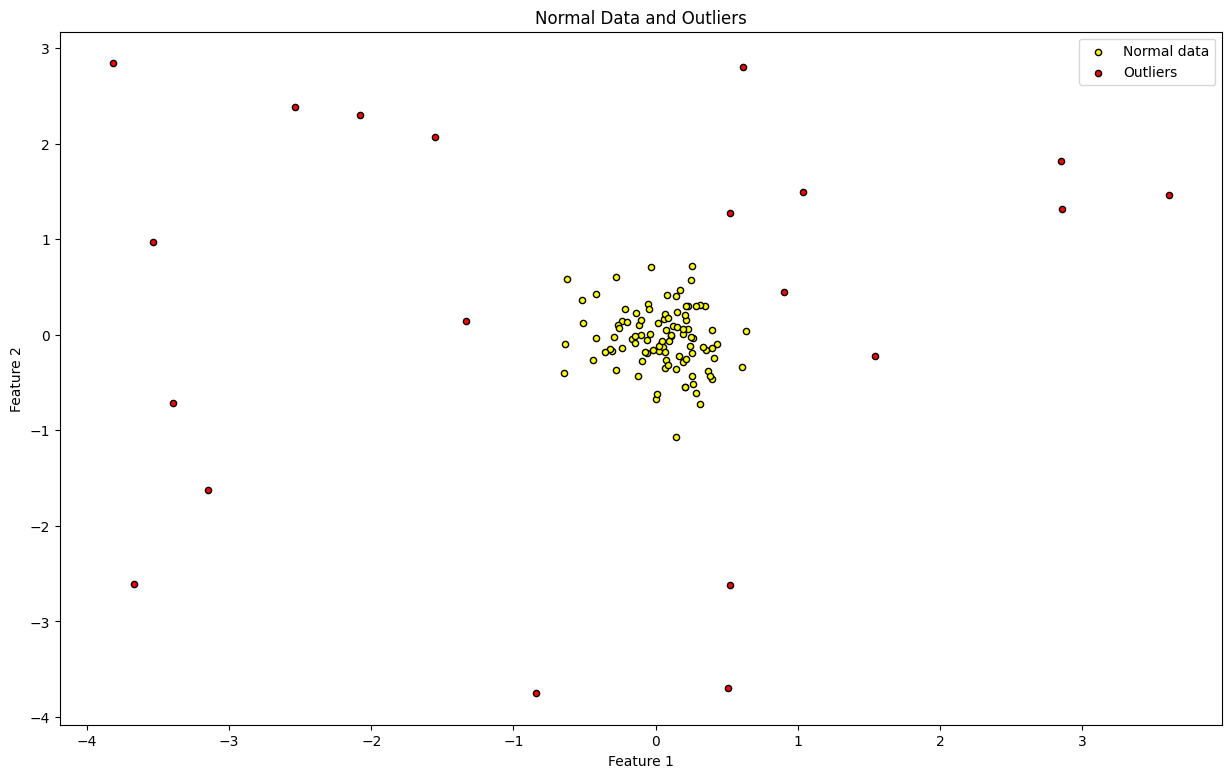

In [2]:
seed = 1234
np.random.seed(seed)

# 정상 데이터
X_normal = 0.3 * np.random.randn(100, 2)

# 이상치 데이터
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 전체 데이터
X = np.vstack([X_normal, X_outliers])


# 시각화
plt.figure(figsize=(15, 9))

plt.scatter(X_normal[:, 0], X_normal[:, 1], c='yellow', edgecolor='k', s=20, label="Normal data")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', edgecolor='k', s=20, label="Outliers")

plt.title("Normal Data and Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()
plt.show()

# Isolation Forest 모델 생성 및 학습

In [3]:
# Isolation Forest 모델 생성을 위한 매개 변수
n_estimators = 100  # 사용할 트리의 수
max_samples = 'auto'  # 각 트리당 최대 샘플 수
contamination = 0.15  # 전체 데이터셋에서 이상치가 차지하는 비율의 추정치
                      # 이 값을 이용해 추후 이상치를 찾아냄
                      # 이상치 점수가 이 임계값보다 높은 데이터 포인트는 이상치로 간주

# Isolation Forest 생성 및 학습
from sklearn.ensemble import IsolationForest
IForest = IsolationForest(n_estimators=n_estimators,
                          max_samples=max_samples,
                          contamination=contamination,
                          random_state=seed)
IForest.fit(X)

IsolationForest(contamination=0.15, random_state=1234)

# Isolation Forest 활용한 이상치 추정

In [4]:
# 모든 데이터에 대한 이상치 점수 계산
# 이 값은 트리 내에서의 평균 경로 depth를 기반으로 계산됨
# 정규화 된 값으로,
# 점수가 낮으면 평균 길이가 짧다고 보면 되며 이상치일 가능성이 ↑

scores_pred = IForest.decision_function(X)
print(scores_pred)

[ 0.14166511  0.13766203  0.13638586  0.1595743   0.09526917  0.13460462
  0.10787957  0.16292724  0.16509756  0.11428299  0.15830682  0.16464866
  0.14663822  0.11675849  0.14447728  0.16100766  0.13899866  0.16304702
  0.16890952  0.07519643  0.16628142  0.10684026  0.15494265  0.16675857
  0.16518124  0.13030604  0.1188853   0.15750937  0.1695692   0.13151369
  0.13848459  0.17015297  0.0853266   0.08646638  0.16399867  0.14590279
  0.16395355  0.08659169  0.14723359  0.16656995  0.00337638  0.14282489
  0.16697924  0.15142341  0.13698078  0.16821458  0.1309908   0.16524443
  0.16024097  0.13300415  0.16492818  0.16446434  0.13810182  0.14831433
  0.12243852  0.11486924  0.15442343  0.16615994  0.11675849  0.16640864
  0.16036481  0.14758148  0.10900245  0.15934193  0.16007976  0.16897277
  0.11375154  0.14668051  0.04257765  0.07784013  0.16475976  0.15444722
  0.14708417  0.15189872  0.07416289  0.15754589  0.1588408   0.13686308
  0.08390004  0.13828391  0.15792319  0.13986166  0

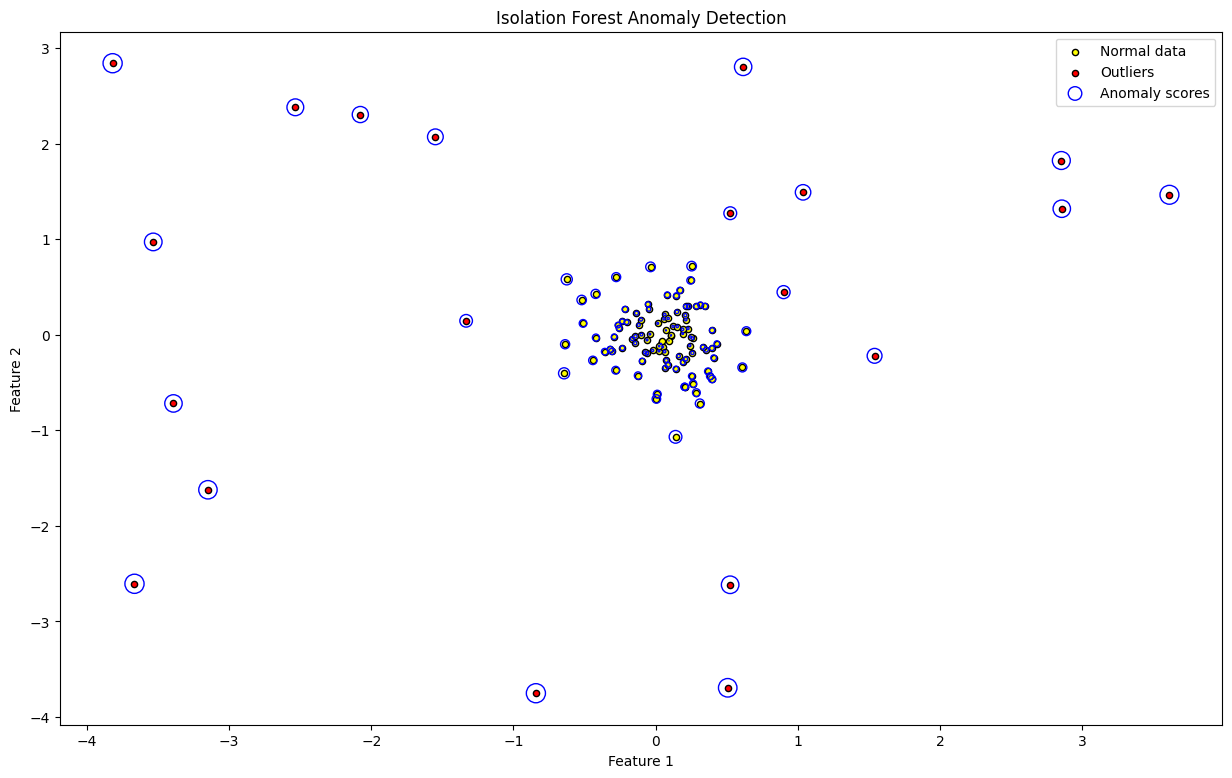

In [5]:
# 이상치 점수를 바탕으로 시각화
plt.figure(figsize=(15, 9))

plt.scatter(X_normal[:, 0], X_normal[:, 1], c='yellow', edgecolor='k', s=20, label="Normal data")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', edgecolor='k', s=20, label="Outliers")

# 이상치 점수에 따라 점의 크기를 조정
# 파란색 원이 클 수록 이상치일 확률이 큰 것을 의미
sizes = (scores_pred.max() - scores_pred) * 500
plt.scatter(X[:, 0], X[:, 1], s=sizes, edgecolor='b', facecolors='none', label="Anomaly scores")

plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()
plt.show()

In [6]:
# 이상치 여부 결정
IForest.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1])

In [7]:
is_outlier = IForest.predict(X) == -1
is_outlier

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [8]:
# 정상 데이터와 이상치 데이터 분리
X_normal_detected = X[~is_outlier]
X_outliers_detected = X[is_outlier]

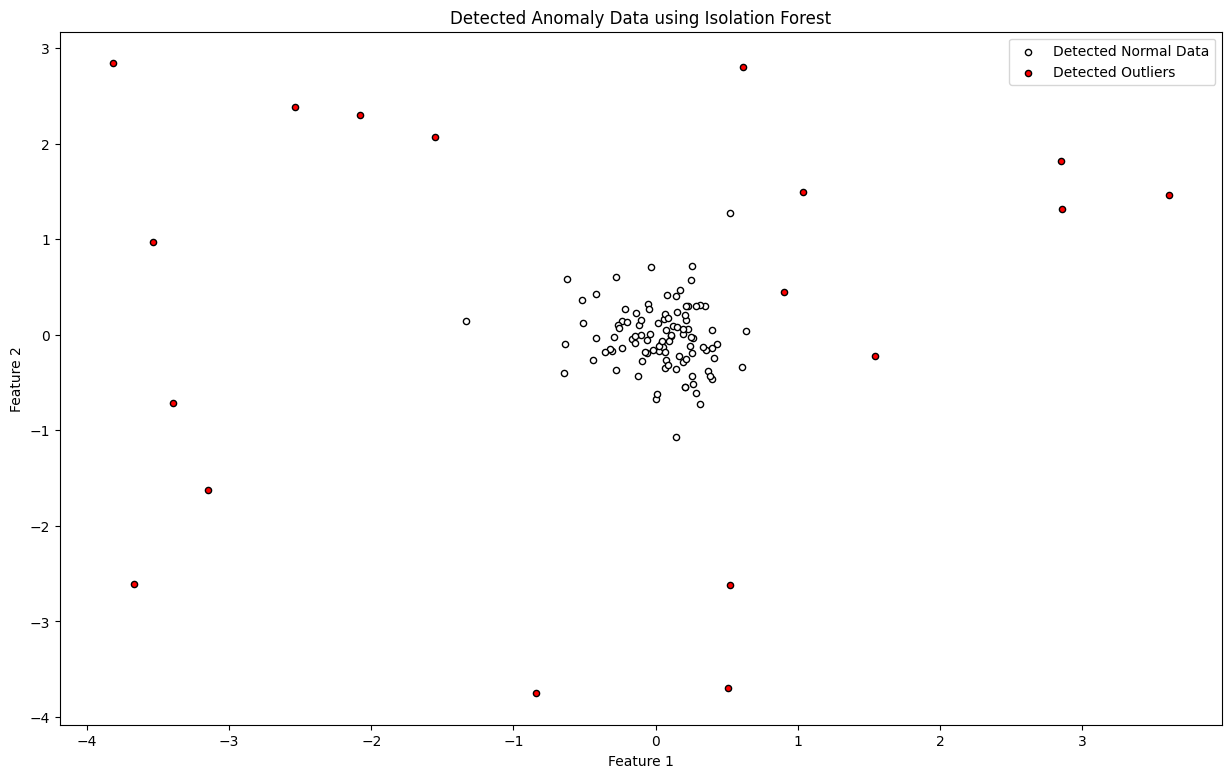

In [9]:
# 시각화
plt.figure(figsize=(15, 9))
plt.scatter(X_normal_detected[:, 0], X_normal_detected[:, 1], c='white', edgecolor='k', s=20, label="Detected Normal Data")
plt.scatter(X_outliers_detected[:, 0], X_outliers_detected[:, 1], c='red', edgecolor='k', s=20, label="Detected Outliers")

plt.title("Detected Anomaly Data using Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

이상치 데이터 정답을 알고있다면
- 이상 데이터를양성으로 놓고 분류 형태의 문제로 평가 가능
- 분류분제 평가
1. 정확도 (Accuracy)
2. 정밀도 (Precision)
3. 재현율 (Recall)
4. F1값

만약 정답이 없다면
- 시각화를 통한 전문가 검토를 진행

# 분류 문제로의 평가

In [11]:
# 실제 레이블을 생성 (0: 정상, 1: 이상치)
y_true = np.zeros(X.shape[0])
y_true[-X_outliers.shape[0]:] = 1  # 마지막 20개 데이터(이상치)에 대해 1 할당!

y_true

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [12]:
# 모델이 예측한 값을 바탕으로 이상치 레이블링
y_pred = IForest.predict(X) # 여기서는 정상이 1, 이상치가 -1
y_pred = np.where(y_pred == 1, 0, 1)  # 정상: 1 -> 0, 이상치: -1 -> 1

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [14]:
# 성능 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'정확도 Accuracy : {accuracy*100:.2f} %')
print(f'정밀도 Precision : {precision*100:.2f} %')
# Precision 이상치야 예상했던것중 진짜 이상치인경우
print(f'재현율 Recall : {recall*100:.2f} %')
# 가운데 모여있는 분포중10%정도가 이상치로 판단 .... 재현율이 낮게나옴
print(f'F1 : {f1*100:.2f} %')

정확도 Accuracy : 98.33 %
정밀도 Precision : 100.00 %
재현율 Recall : 90.00 %
F1 : 94.74 %
